In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/cleaned_food_delivery_data.csv')

In [3]:
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_order_time,delivery_speed
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45,Fast
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48,Fast
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51,Fast
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40,Fast
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49,Fast


In [4]:
rating_df = df[df['rating'].notna()]

In [5]:
rating_df.shape

(1162, 11)

In [6]:
corr = rating_df[['food_preparation_time', 'delivery_time', 'rating']].corr()
corr

,food_preparation_time,delivery_time,rating
food_preparation_time,1.000000,-0.008635,-0.006083
delivery_time,-0.008635,1.000000,-0.009804
rating,-0.006083,-0.009804,1.000000


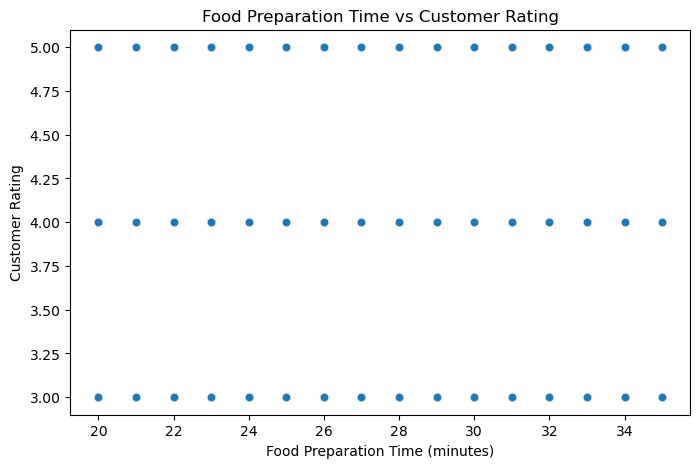

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='food_preparation_time',
    y='rating',
    data=rating_df,
    alpha=0.5
)
plt.title('Food Preparation Time vs Customer Rating')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Customer Rating')
plt.show()


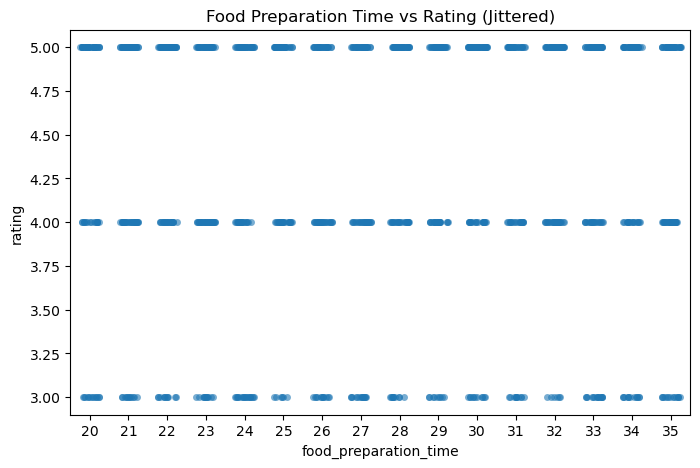

In [8]:
plt.figure(figsize=(8,5))
sns.stripplot(
    x='food_preparation_time',
    y='rating',
    data=rating_df,
    jitter=0.25,
    alpha=0.6
)
plt.title('Food Preparation Time vs Rating (Jittered)')
plt.show()


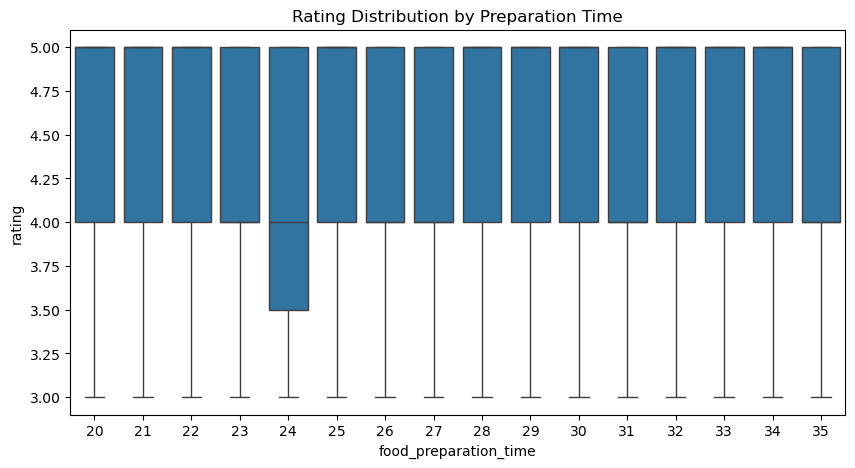

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x='food_preparation_time',
    y='rating',
    data=rating_df
)
plt.title('Rating Distribution by Preparation Time')
plt.show()


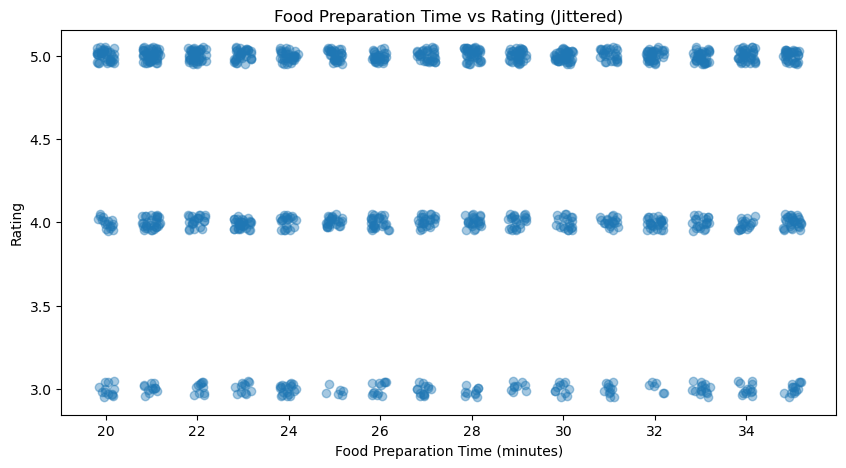

In [10]:
import numpy as np
plt.figure(figsize=(10,5))

plt.scatter(
    df['food_preparation_time'] + np.random.uniform(-0.2, 0.2, size=len(df)),
    df['rating'] + np.random.uniform(-0.05, 0.05, size=len(df)),
    alpha=0.4
)

plt.xlabel("Food Preparation Time (minutes)")
plt.ylabel("Rating")
plt.title("Food Preparation Time vs Rating (Jittered)")
plt.show()


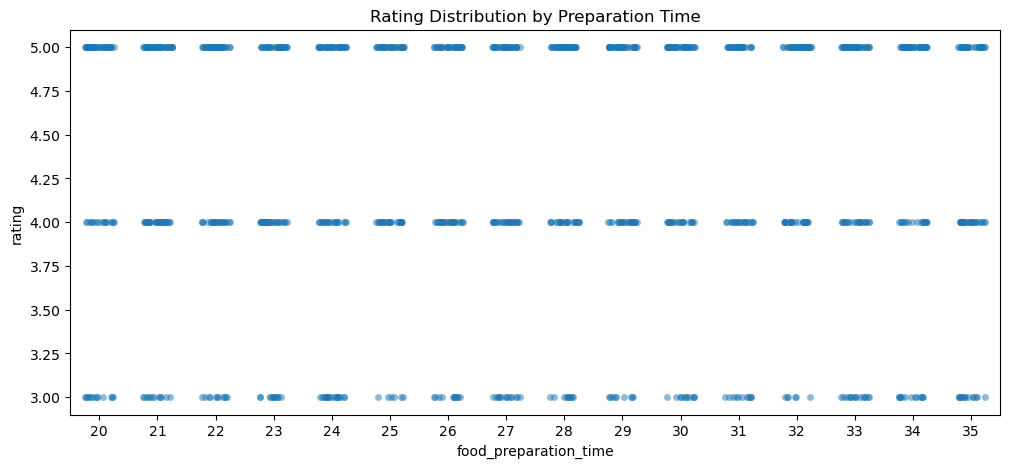

In [11]:
import seaborn as sns

plt.figure(figsize=(12,5))
sns.stripplot(
    x='food_preparation_time',
    y='rating',
    data=df,
    jitter=0.25,
    alpha=0.5
)
plt.title("Rating Distribution by Preparation Time")
plt.show()


In [12]:
avg_rating = (
    df
    .groupby('food_preparation_time')['rating']
    .mean()
    .reset_index()
)


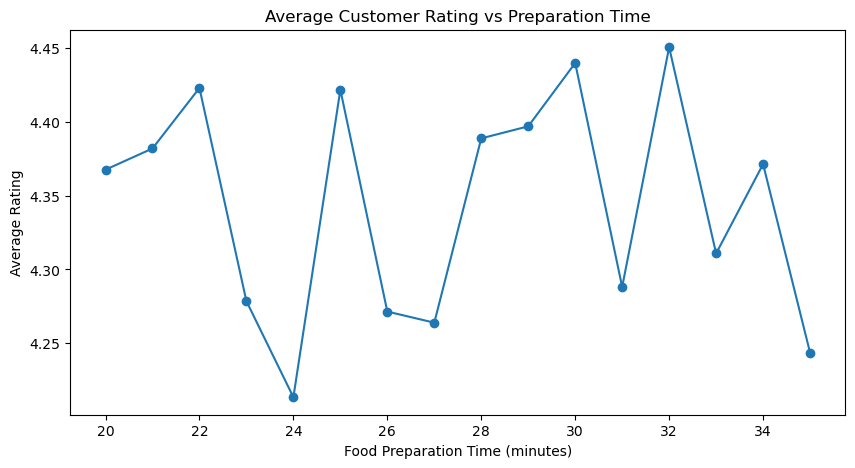

In [13]:
plt.figure(figsize=(10,5))
plt.plot(
    avg_rating['food_preparation_time'],
    avg_rating['rating'],
    marker='o'
)

plt.xlabel("Food Preparation Time (minutes)")
plt.ylabel("Average Rating")
plt.title("Average Customer Rating vs Preparation Time")
plt.show()


In [14]:
corr = df['food_preparation_time'].corr(df['rating'])
corr

np.float64(-0.006082836149954096)

In [15]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(df['food_preparation_time'], df['rating'])
spearman_corr


nan

In [16]:
clean_corr_df = df[['food_preparation_time', 'rating']].dropna()

from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(
    clean_corr_df['food_preparation_time'],
    clean_corr_df['rating']
)

spearman_corr


np.float64(-0.0068211372605631974)

Create Restaurant Performance Table

In [17]:
restaurant_perf = (
    df
    .groupby('restaurant_name')
    .agg(
        total_orders=('order_id', 'count'),
        total_revenue=('cost_of_the_order', 'sum'),
        avg_rating=('rating', 'mean'),
        rated_orders=('rating', 'count')
    )
    .reset_index()
)


Add Rating Coverage %

In [18]:
restaurant_perf['rating_coverage_pct'] = (
    restaurant_perf['rated_orders'] / restaurant_perf['total_orders'] * 100
)


Sort Top Restaurants by Revenue

In [19]:
top_restaurants = restaurant_perf.sort_values(
    by='total_revenue',
    ascending=False
)

top_restaurants.head(10)


,restaurant_name,total_orders,total_revenue,avg_rating,rated_orders,rating_coverage_pct
136,Shake Shack,219,3579.53,4.278195,133,60.730594
153,The Meatball Shop,132,2145.21,4.511905,84,63.636364
21,Blue Ribbon Sushi,119,1903.95,4.219178,73,61.344538
20,Blue Ribbon Fried Chicken,96,1662.29,4.328125,64,66.666667
109,Parm,68,1112.76,4.128205,39,57.352941
121,RedFarm Broadway,59,965.13,4.243902,41,69.491525
122,RedFarm Hudson,55,921.21,4.176471,34,61.818182
145,TAO,49,834.50,4.357143,28,57.142857
66,Han Dynasty,46,755.29,4.434783,23,50.000000
22,Blue Ribbon Sushi Bar & Grill,44,666.62,4.590909,22,50.000000


In [20]:
df.to_csv("cleaned_food_delivery_data.csv", index=False)

In [22]:
restaurant_perf.to_csv("restaurant_performance.csv", index=False)
